# Quality Measures
---
Quality measures for Masked Face Detection project.
* **accuracy** - for silhouette/face detection and face classification
* **IoU** (Intersection of Union) - for human silhouette and face detection
* **area precision/recall** - for face area/skin/masking mask detection

In [1]:
import numpy as np

from PIL import Image

from src.quality_measures import (highlight_detections, intersection_of_union,
                                  highlight_predictions, classification_metrics,
                                  convert_mask, invert_mask, subtract_masks, mask_area_metrics)
from src.visualize import show_images, show_many_images

In [2]:
MAX_CANDIDATES = 20

## Silhouettes detection

People without masks

In [3]:
img = Image.open('images/final/people_unmasked.jpg')
desc = 'people without masks'

silh_gt = np.array([[40, 23, 194, 577],
                    [267, 38, 473, 575],
                    [578, 33, 714, 566],
                    [776, 39, 899, 387],
                    [829, 39, 987, 539],
                    [928, 35, 1021, 352]
                   ])
silh_pred = np.array([[39, 30, 192, 560],
                      [262, 46, 482, 577],
                      [575, 39, 714, 566],
                      [777, 35, 865, 363],
                      [824, 40, 980, 538],
                      [932, 41, 1014, 352]
                     ])
silh_pred_wrong = np.array([[906, 39, 973, 132],
                            [770, 35, 805, 153],
                            [770, 46, 805, 345]
                           ])

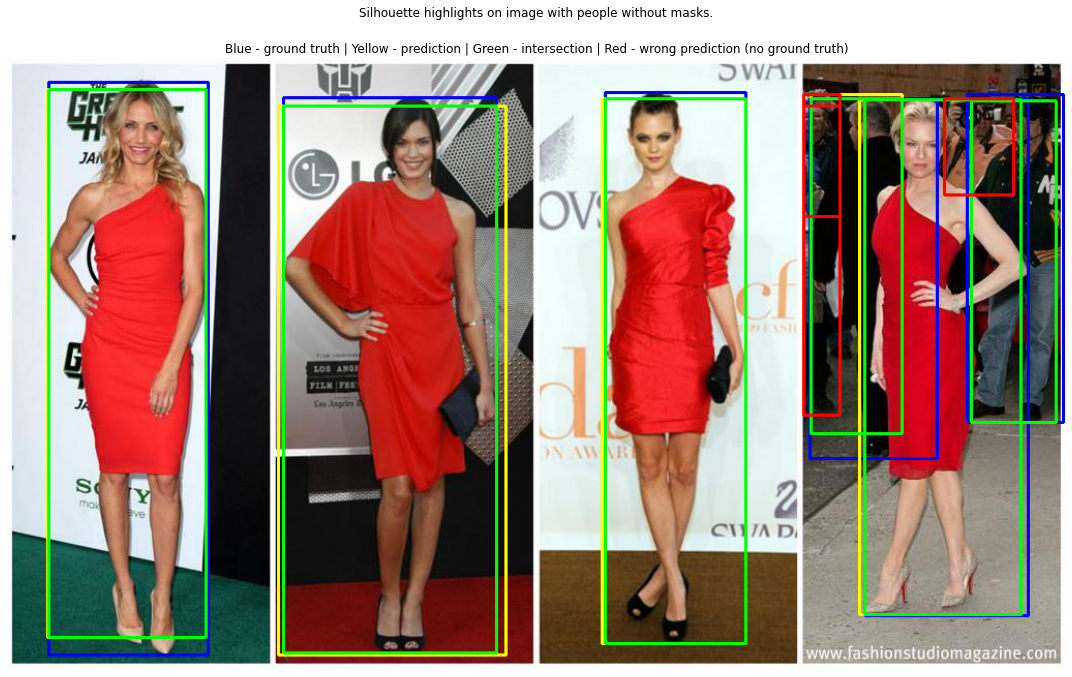

In [4]:
img_h = highlight_detections(img, silh_gt, silh_pred, silh_pred_wrong, highlight_int=True)
acc = (MAX_CANDIDATES - len(silh_pred_wrong))/MAX_CANDIDATES*100
iou = intersection_of_union(silh_gt, silh_pred)
show_images([img_h], ['Blue - ground truth | Yellow - prediction | Green - intersection | Red - wrong prediction (no ground truth)'],
            suptitle=f'Silhouette highlights on image with {desc}.')

In [6]:
print(f'For {desc} there are {len(silh_pred)} correct and {len(silh_pred_wrong)} incorrect silhouette detections.')
print(f'Assuming that there are {MAX_CANDIDATES} candidate areas, the accuracy of detection equals: {acc:.2f}%.')
print(f'The IoU aggregated scores are following: max: {np.max(iou):.2f} | mean: {np.mean(iou):.2f} | min: {np.min(iou):.2f}')
iou

For people without masks there are 6 correct and 3 incorrect silhouette detections.
Assuming that there are 20 candidate areas, the accuracy of detection equals: 85.00%.
The IoU aggregated scores are following: max: 96.76 | mean: 87.91 | min: 66.07


array([93.84246208, 91.98602154, 96.76382832, 66.06729076, 92.27880722,
       86.50317153])

People with masks

In [7]:
img = Image.open('images/final/people_masked.jpg')
desc = 'people with masks'

silh_gt = np.array([[6, 139, 505, 754],
                    [404, 138, 794, 784]
                   ])
silh_pred = np.array([[0, 130, 497, 800],
                      [426, 131, 800, 800]
                     ])
silh_pred_wrong = np.array([[93, 106, 760, 792]
                           ])

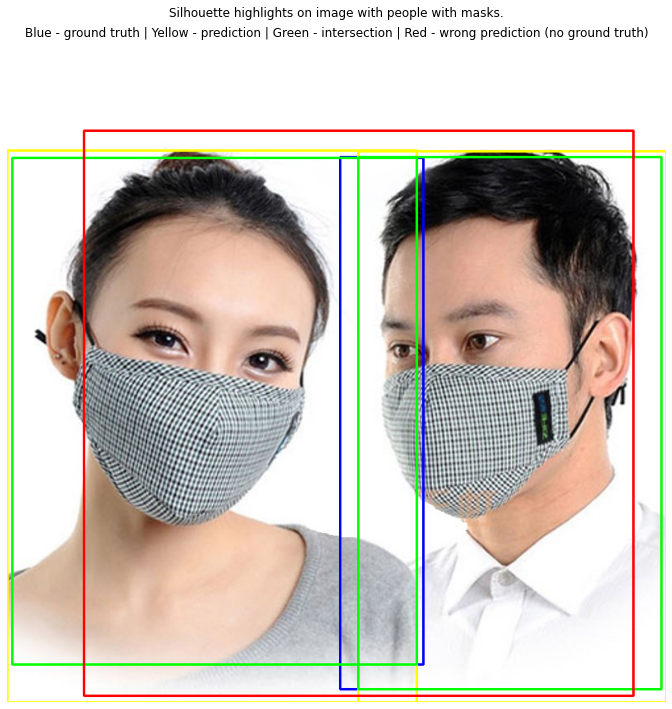

In [8]:
img_h = highlight_detections(img, silh_gt, silh_pred, silh_pred_wrong, highlight_int=True)
acc = (MAX_CANDIDATES - len(silh_pred_wrong))/MAX_CANDIDATES*100
iou = intersection_of_union(silh_gt, silh_pred)
show_images([img_h], ['Blue - ground truth | Yellow - prediction | Green - intersection | Red - wrong prediction (no ground truth)'],
            suptitle=f'Silhouette highlights on image with {desc}.')

In [10]:
print(f'For {desc} there are {len(silh_pred)} correct and {len(silh_pred_wrong)} incorrect silhouette detections.')
print(f'Assuming that there are {MAX_CANDIDATES} candidate areas, the accuracy of detection equals: {acc:.2f}%.')
print(f'The IoU aggregated scores are following: max: {np.max(iou):.2f} | mean: {np.mean(iou):.2f} | min: {np.min(iou):.2f}')
iou

For people with masks there are 2 correct and 1 incorrect silhouette detections.
Assuming that there are 20 candidate areas, the accuracy of detection equals: 95.00%.
The IoU aggregated scores are following: max: 89.91 | mean: 89.63 | min: 89.36


array([89.36255216, 89.90613347])

Masked criminals

In [11]:
img = Image.open('images/final/people_criminal.jpg')
desc = 'masked criminals'

silh_gt = np.array([[27, 62, 559, 661],
                    [195, 34, 1009, 672]
                   ])
silh_pred = np.array([[20, 29, 620, 679],
                      [335, 24, 1012, 679]
                     ])
silh_pred_wrong = np.array([
                           ])

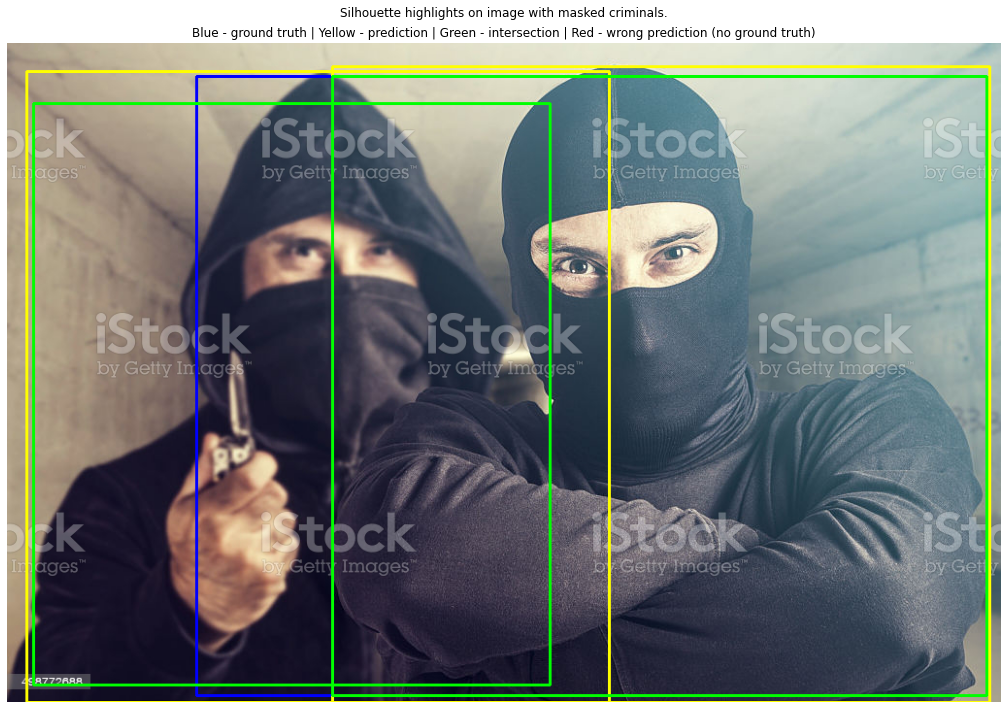

In [12]:
img_h = highlight_detections(img, silh_gt, silh_pred, silh_pred_wrong, highlight_int=True)
acc = (MAX_CANDIDATES - len(silh_pred_wrong))/MAX_CANDIDATES*100
iou = intersection_of_union(silh_gt, silh_pred)
show_images([img_h], ['Blue - ground truth | Yellow - prediction | Green - intersection | Red - wrong prediction (no ground truth)'],
            suptitle=f'Silhouette highlights on image with {desc}.')

In [14]:
print(f'For {desc} there are {len(silh_pred)} correct and {len(silh_pred_wrong)} incorrect silhouette detections.')
print(f'Assuming that there are {MAX_CANDIDATES} candidate areas, the accuracy of detection equals: {acc:.2f}%.')
print(f'The IoU aggregated scores are following: max: {np.max(iou):.2f} | mean: {np.mean(iou):.2f} | min: {np.min(iou):.2f}')
iou

For masked criminals there are 2 correct and 0 incorrect silhouette detections.
Assuming that there are 20 candidate areas, the accuracy of detection equals: 100.00%.
The IoU aggregated scores are following: max: 81.71 | mean: 81.21 | min: 80.71


array([81.70974359, 80.71477508])

## Faces detection

People without masks

In [15]:
img = Image.open('images/final/people_unmasked.jpg')
desc = 'people without masks'

face_gt = np.array([[104, 35, 154, 104],
                    [371, 50, 413, 115],
                    [603, 41, 647, 108],
                    [816, 47, 856, 90],
                    [863, 51, 904, 114]
                   ])
face_pred = np.array([[106, 39, 154, 101],
                      [371, 59, 413, 114],
                      [607, 51, 647, 108],
                      [815, 50, 846, 88],
                      [868, 62, 906, 117]
                     ])
face_pred_wrong = np.array([[769, 34, 797, 62]
                           ])

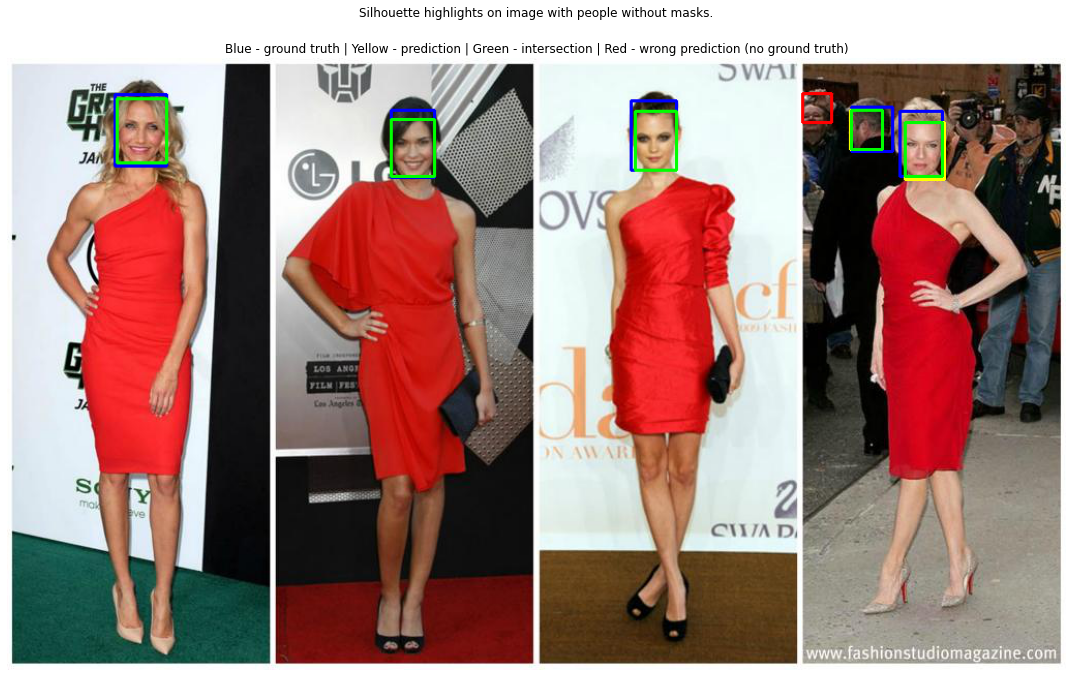

In [16]:
img_h = highlight_detections(img, face_gt, face_pred, face_pred_wrong, highlight_int=True)
acc = (MAX_CANDIDATES - len(face_pred_wrong))/MAX_CANDIDATES*100
iou = intersection_of_union(face_gt, face_pred)
show_images([img_h], ['Blue - ground truth | Yellow - prediction | Green - intersection | Red - wrong prediction (no ground truth)'],
            suptitle=f'Silhouette highlights on image with {desc}.')

In [18]:
print(f'For {desc} there are {len(face_pred)} correct and {len(face_pred_wrong)} incorrect face detections.')
print(f'Assuming that there are {MAX_CANDIDATES} candidate areas, the accuracy of detection equals: {acc:.2f}%.')
print(f'The IoU aggregated scores are following: max: {np.max(iou):.2f} | mean: {np.mean(iou):.2f} | min: {np.min(iou):.2f}')
iou

For people without masks there are 5 correct and 1 incorrect face detections.
Assuming that there are 20 candidate areas, the accuracy of detection equals: 95.00%.
The IoU aggregated scores are following: max: 86.26 | mean: 75.98 | min: 64.85


array([86.26086957, 84.61538462, 77.34056988, 64.84641638, 66.83327383])

People with masks

In [19]:
img = Image.open('images/final/people_masked.jpg')
desc = 'people with masks'

face_gt = np.array([[99, 213, 368, 579],
                    [446, 221, 699, 565]
                   ])
face_pred = np.array([[81, 183, 376, 586],
                      [455, 178, 721, 577]
                     ])
face_pred_wrong = np.array([
                           ])

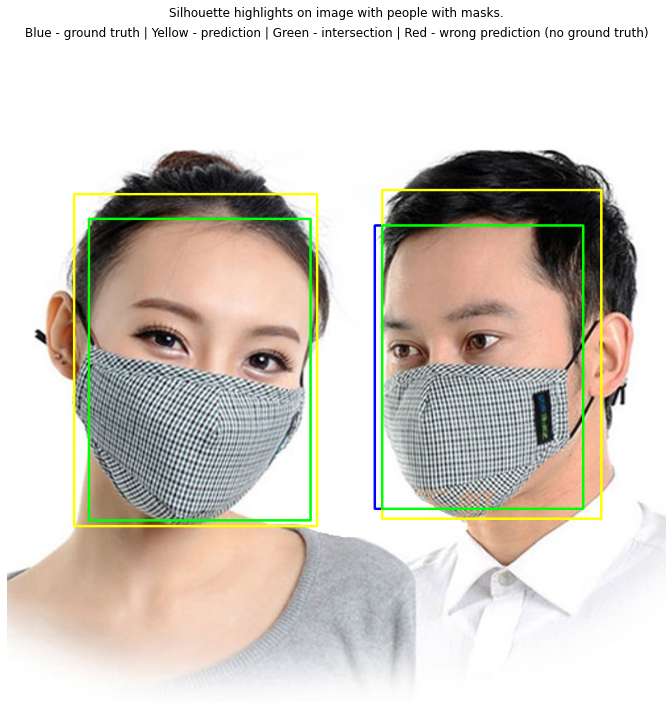

In [20]:
img_h = highlight_detections(img, face_gt, face_pred, face_pred_wrong, highlight_int=True)
acc = (MAX_CANDIDATES - len(face_pred_wrong))/MAX_CANDIDATES*100
iou = intersection_of_union(face_gt, face_pred)
show_images([img_h], ['Blue - ground truth | Yellow - prediction | Green - intersection | Red - wrong prediction (no ground truth)'],
            suptitle=f'Silhouette highlights on image with {desc}.')

In [22]:
print(f'For {desc} there are {len(silh_pred)} correct and {len(face_pred_wrong)} incorrect face detections.')
print(f'Assuming that there are {MAX_CANDIDATES} candidate areas, the accuracy of detection equals: {acc:.2f}%.')
print(f'The IoU aggregated scores are following: max: {np.max(iou):.2f} | mean: {np.mean(iou):.2f} | min: {np.min(iou):.2f}')
iou

For people with masks there are 2 correct and 0 incorrect face detections.
Assuming that there are 20 candidate areas, the accuracy of detection equals: 100.00%.
The IoU aggregated scores are following: max: 82.81 | mean: 79.83 | min: 76.84


array([82.81448459, 76.84335805])

Masked criminals

In [23]:
img = Image.open('images/final/people_criminal.jpg')
desc = 'masked criminals'

face_gt = np.array([[234, 153, 440, 402],
                    [530, 128, 736, 384]
                   ])
face_pred = np.array([[235, 132, 428, 423],
                      [517, 85, 759, 422]
                     ])
face_pred_wrong = np.array([[196, 423, 307, 558]
                           ])

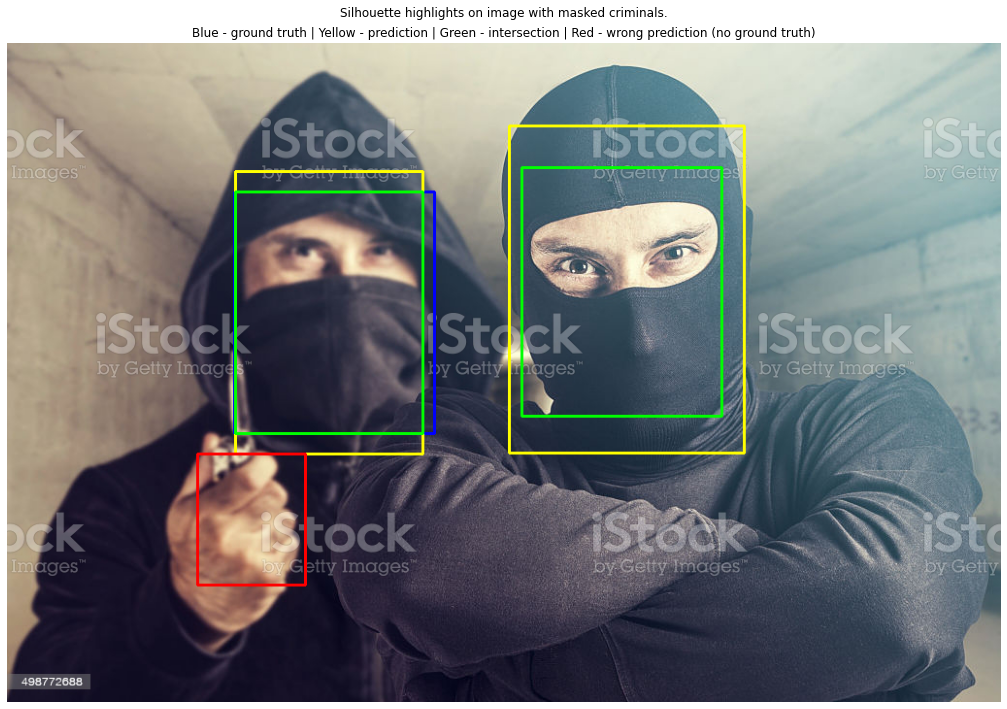

In [24]:
img_h = highlight_detections(img, face_gt, face_pred, face_pred_wrong, highlight_int=True)
acc = (MAX_CANDIDATES - len(face_pred_wrong))/MAX_CANDIDATES*100
iou = intersection_of_union(face_gt, face_pred)
show_images([img_h], ['Blue - ground truth | Yellow - prediction | Green - intersection | Red - wrong prediction (no ground truth)'],
            suptitle=f'Silhouette highlights on image with {desc}.')

In [26]:
print(f'For {desc} there are {len(silh_pred)} correct and {len(face_pred_wrong)} incorrect face detections.')
print(f'Assuming that there are {MAX_CANDIDATES} candidate areas, the accuracy of detection equals: {acc:.2f}%.')
print(f'The IoU aggregated scores are following: max: {np.max(iou):.2f} | mean: {np.mean(iou):.2f} | min: {np.min(iou):.2f}')
iou

For masked criminals there are 2 correct and 1 incorrect face detections.
Assuming that there are 20 candidate areas, the accuracy of detection equals: 95.00%.
The IoU aggregated scores are following: max: 80.90 | mean: 72.78 | min: 64.66


array([80.9040404 , 64.66390367])

## Faces classification

In [27]:
img = Image.open('images/final/mask0.jpg')
aspect = 'anti-COVID19 mask presence'
f_coords = np.array([[582,545,649,621],
                     [328,300,379,365],
                     [686,480,738,541],
                     [683,332,726,386],
                     [1047,580,1113,662],
                     [1176,486,1223,554],
                     [1039,435,1091,499],
                     [522,298,570,352],
                     [1192,600,1249,679],
                     [825,549,876,608],
                     [373,198,409,242],
                     [179,418,226,481],
                     [352,528,416,603],
                     [726,307,768,358],
                     [878,279,912,324],
                     [180,248,217,299],
                     [264,255,294,287],
                     [261,617,367,746],
                     [3,580,52,660],
                     [916,365,961,411],
                     [437,168,481,211],
                     [879,213,911,253]])

f_gt = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])
f_pr = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])
a, p, r = classification_metrics(f_gt, f_pr)

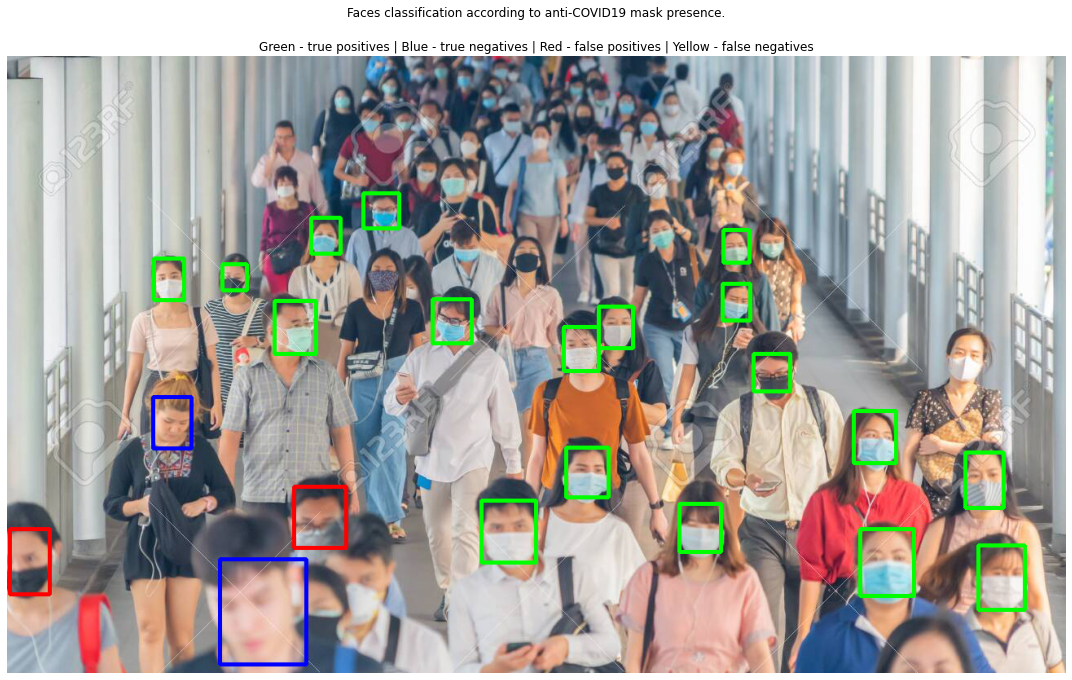

In [28]:
img_h = highlight_predictions(img, f_coords, f_gt, f_pr)
show_images([img_h], ['Green - true positives | Blue - true negatives | Red - false positives | Yellow - false negatives'],
            suptitle=f'Faces classification according to {aspect}.')

In [30]:
print(f'According to {aspect} the accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')

According to anti-COVID19 mask presence the accuracy results in 90.91%, precision - 100.00% and recall - 90.00%.


In [31]:
img = Image.open('images/final/mask1.jpg')
aspect = 'correctly put anti COVID-19 mask'

f_coords = np.array([[520, 424, 594, 520],
                     [879, 209, 917, 261],
                     [47, 319, 106, 386],
                     [1021, 464, 1080, 548],
                     [1032, 291, 1078, 343],
                     [1100, 346, 1155, 415],
                     [546, 638, 624, 734],
                     [1204, 466, 1266, 549],
                     [323, 307, 369, 367],
                     [811, 649, 918, 762],
                     [466, 348, 509, 411],
                     [719, 418, 772, 479],
                     [823, 386, 868, 448],
                     [120, 302, 174, 369],
                     [736, 474, 820, 576],
                     [637, 255, 686, 310],
                     [458, 584, 523, 664],
                     [675, 458, 737, 536],
                     [251, 322, 305, 387],
                     [1006, 195, 1053, 245],
                     [696, 246, 728, 291],
                     [812, 221, 859, 280],
                     [934, 210, 979, 272],
                     [379, 260, 417, 312],
                     [856, 321, 916, 379],
                     [833, 434, 896, 512],
                     [731, 335, 774, 392],
                     [920, 195, 953, 237]])

f_gt = np.array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])
f_pr = np.array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])
a, p, r = classification_metrics(f_gt, f_pr)

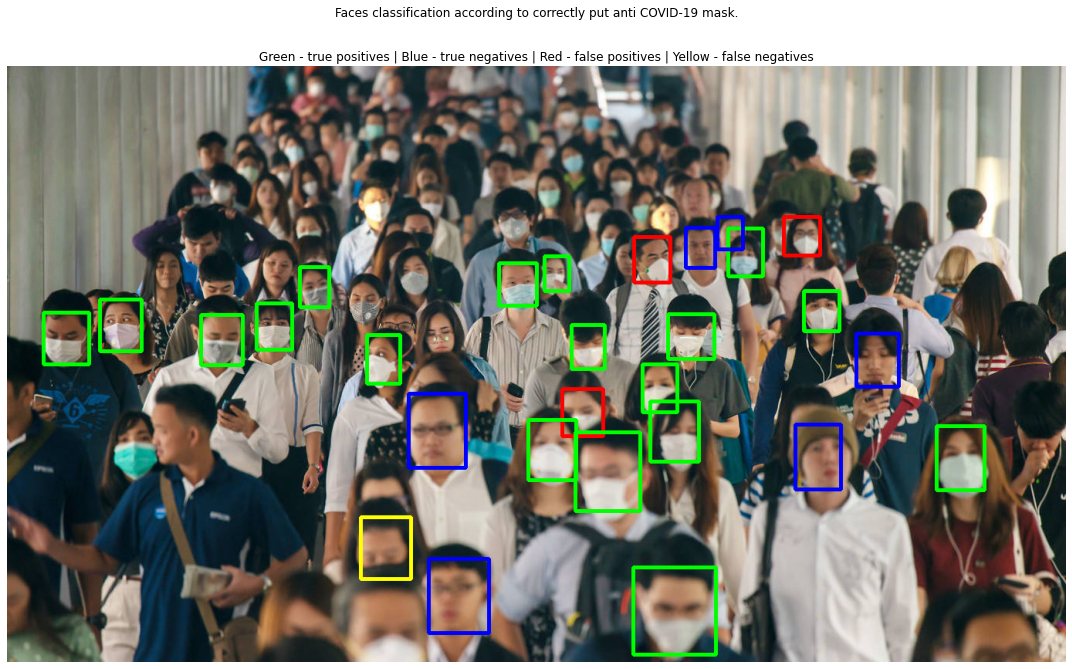

In [32]:
img_h = highlight_predictions(img, f_coords, f_gt, f_pr)
show_images([img_h], ['Green - true positives | Blue - true negatives | Red - false positives | Yellow - false negatives'],
            suptitle=f'Faces classification according to {aspect}.')

In [34]:
print(f'According to {aspect} the accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')

According to correctly put anti COVID-19 mask the accuracy results in 85.71%, precision - 94.74% and recall - 85.71%.


## Face masks

In [35]:
idx = 0
face = Image.open(f'images/final/face{idx}.png')
face_fam = Image.open(f'images/final/face{idx}_faceareamask.png')
face_fam = invert_mask(convert_mask(face_fam))  # convert to rgb & invert
face_sm = Image.open(f'images/final/face{idx}_skinmask.png')
face_sm = invert_mask(convert_mask(face_sm))  # convert to rgb & invert
face_fm = Image.open(f'images/final/face{idx}_finalmask.png')
face_fm = invert_mask(convert_mask(face_fm))  # convert to rgb & invert
face_pfam = Image.open(f'images/final/face{idx}_pred_faceareamask.png')
face_psm = Image.open(f'images/final/face{idx}_pred_skinmask.png')
face_pfm = Image.open(f'images/final/face{idx}_pred_finalmask.png')
face_pfm = invert_mask(subtract_masks(face_pfm, face_pfam))  # subtract face area mask & invert

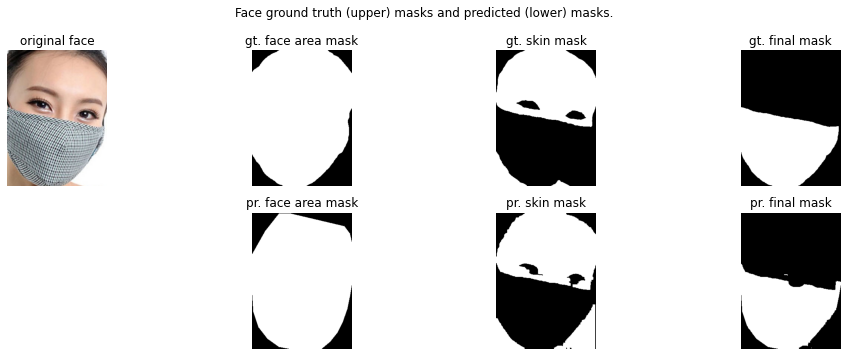

In [36]:
show_many_images([face, face_fam, face_sm, face_fm,
                  np.full(np.array(face).shape, 255, dtype=np.uint8), face_pfam, face_psm, face_pfm],
                 ['original face', 'gt. face area mask', 'gt. skin mask', 'gt. final mask',
                  '', 'pr. face area mask', 'pr. skin mask', 'pr. final mask'],
                 n_cols=4, suptitle='Face ground truth (upper) masks and predicted (lower) masks.')

In [38]:
a, p, r = mask_area_metrics(face_fam, face_pfam)
print(f'Face area mask areal accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')
a, p, r = mask_area_metrics(face_sm, face_psm)
print(f'Skin mask areal accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')
a, p, r = mask_area_metrics(face_fm, face_pfm)
print(f'Final mask areal accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')

Face area mask areal accuracy results in 92.58%, precision - 96.36% and recall - 94.94%.
Skin mask areal accuracy results in 91.51%, precision - 86.97% and recall - 96.21%.
Final mask areal accuracy results in 97.76%, precision - 97.48% and recall - 96.92%.


In [39]:
idx = 1
face = Image.open(f'images/final/face{idx}.png')
face_fam = Image.open(f'images/final/face{idx}_faceareamask.png')
face_fam = invert_mask(convert_mask(face_fam))  # convert to rgb & invert
face_sm = Image.open(f'images/final/face{idx}_skinmask.png')
face_sm = invert_mask(convert_mask(face_sm))  # convert to rgb & invert
face_fm = Image.open(f'images/final/face{idx}_finalmask.png')
face_fm = invert_mask(convert_mask(face_fm))  # convert to rgb & invert
face_pfam = Image.open(f'images/final/face{idx}_pred_faceareamask.png')
face_psm = Image.open(f'images/final/face{idx}_pred_skinmask.png')
face_pfm = Image.open(f'images/final/face{idx}_pred_finalmask.png')
face_pfm = invert_mask(subtract_masks(face_pfm, face_pfam))  # subtract face area mask & invert

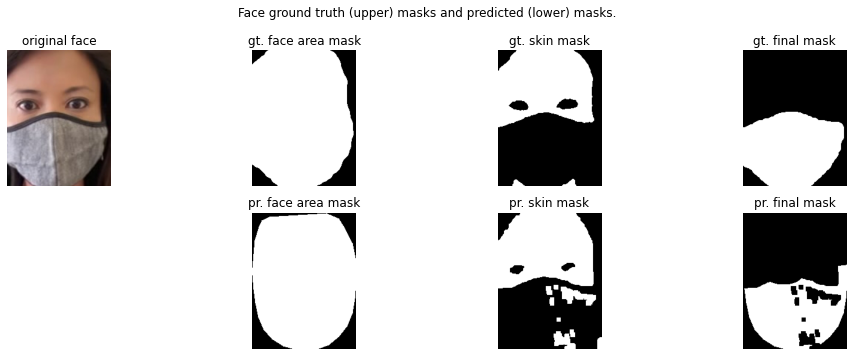

In [40]:
show_many_images([face, face_fam, face_sm, face_fm,
                  np.full(np.array(face).shape, 255, dtype=np.uint8), face_pfam, face_psm, face_pfm],
                 ['original face', 'gt. face area mask', 'gt. skin mask', 'gt. final mask',
                  '', 'pr. face area mask', 'pr. skin mask', 'pr. final mask'],
                 n_cols=4, suptitle='Face ground truth (upper) masks and predicted (lower) masks.')

In [42]:
a, p, r = mask_area_metrics(face_fam, face_pfam)
print(f'Face area mask areal accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')
a, p, r = mask_area_metrics(face_sm, face_psm)
print(f'Skin mask areal accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')
a, p, r = mask_area_metrics(face_fm, face_pfm)
print(f'Final mask areal accuracy results in {a*100:.2f}%, precision - {p*100:.2f}% and recall - {r*100:.2f}%.')

Face area mask areal accuracy results in 91.31%, precision - 95.15% and recall - 94.74%.
Skin mask areal accuracy results in 91.30%, precision - 84.80% and recall - 96.50%.
Final mask areal accuracy results in 87.30%, precision - 91.94% and recall - 76.66%.
